In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from VAE_model_tablets_class import VAE
import torch
from era_data import TabletPeriodDataset, get_IDS
import warnings
from visualization_funcs import generate_image_from_VAE, generate_mean_tablet_plot, hierarchical_clustering_and_dendrogram

# Filter out the FutureWarnings specifically for is_sparse
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#df_encodings_train = pd.read_csv('vae_encodings_and_data/vae_encoding_df_sept30_train.csv')
df_encodings_train = pd.read_csv('vae_encodings_and_data/vae_encoding_df_Oct2-v3_w_class_train.csv')

#df_encodings_test = pd.read_csv('vae_encodings_and_data/vae_encoding_df_sept30_test.csv')
df_encodings_test = pd.read_csv('vae_encodings_and_data/vae_encoding_df_Oct2-v3_w_class_test.csv')

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# IMG_DIR = 'output/images'
RUN_NAME_SUFFIX = '-masked_w_classification_loss' # ''
IMG_DIR = 'output/images_preprocessed'
LR = 5e-5
EPOCHS = 30
BATCH_SIZE = 16
SUFFIX = '-resnet50'
DATE = 'Oct2-v3'

In [4]:
IDS = get_IDS(IMG_DIR=IMG_DIR)
len(IDS)

VERSION_NAME = f'period_clf_bs{BATCH_SIZE}_lr{LR}_{EPOCHS}epochs{SUFFIX}-{len(IDS)}_samples{RUN_NAME_SUFFIX}_blurvae-conv-{DATE}'

num_classes = len(TabletPeriodDataset.PERIOD_INDICES)

class_weights = torch.load("data/class_weights_period.pt")

In [5]:
chekpoint_path = f'lightning_logs/{VERSION_NAME}/checkpoints/epoch=29-step=407516.ckpt'
vae_model = VAE.load_from_checkpoint(chekpoint_path,image_channels=1,z_dim=16, lr =1e-5, use_classification_loss=True, num_classes=num_classes,
            loss_type="weighted", class_weights=class_weights, device = device)

/sise/mickyfi-group/kapond/AnalysisBySynthesis/VAE_model_tablets_class.py:95: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.class_weights = torch.tensor(class_weights).to(device)


In [6]:
genre = ["School", "Lexical", "Mathematial"]

In [7]:
df_enc_genre = df_encodings_train[df_encodings_train["Genre_Name"].isin(genre)]

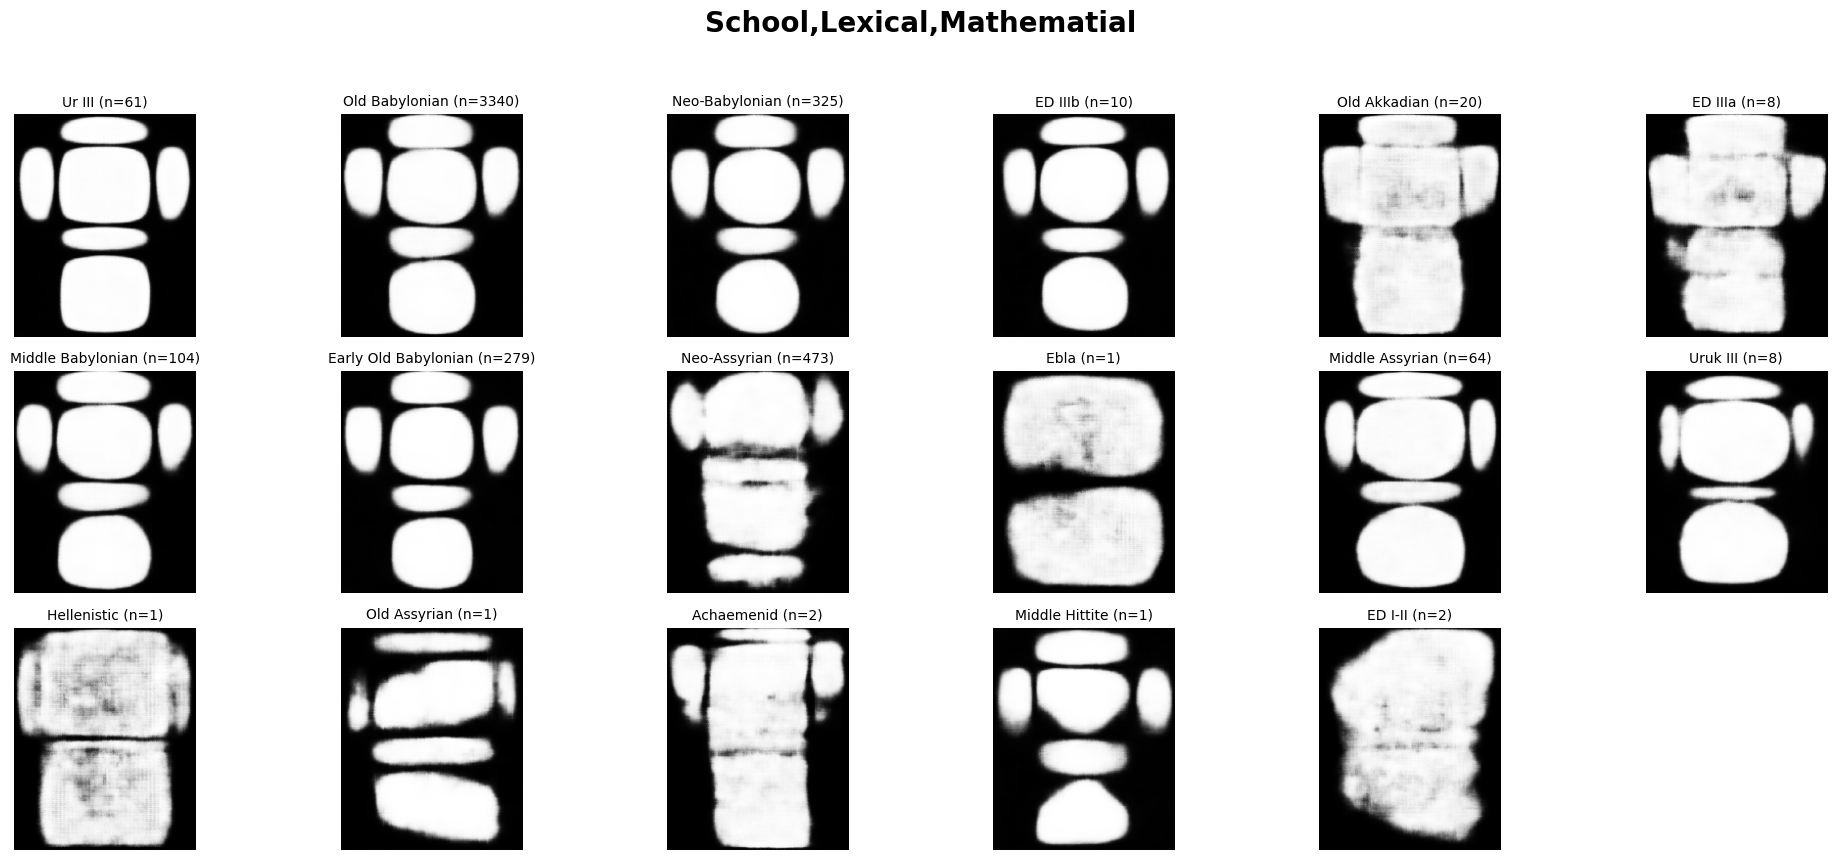

In [8]:
mean_encodings_df = generate_mean_tablet_plot(df = df_enc_genre.drop(["Genre", "Genre_Name", "Period"], axis = 1), 
                          column_name = "Period_Name", model=vae_model, grid_title = ",".join(genre), save_path="output/"+",".join(genre)+"_genre_by_periods.png")

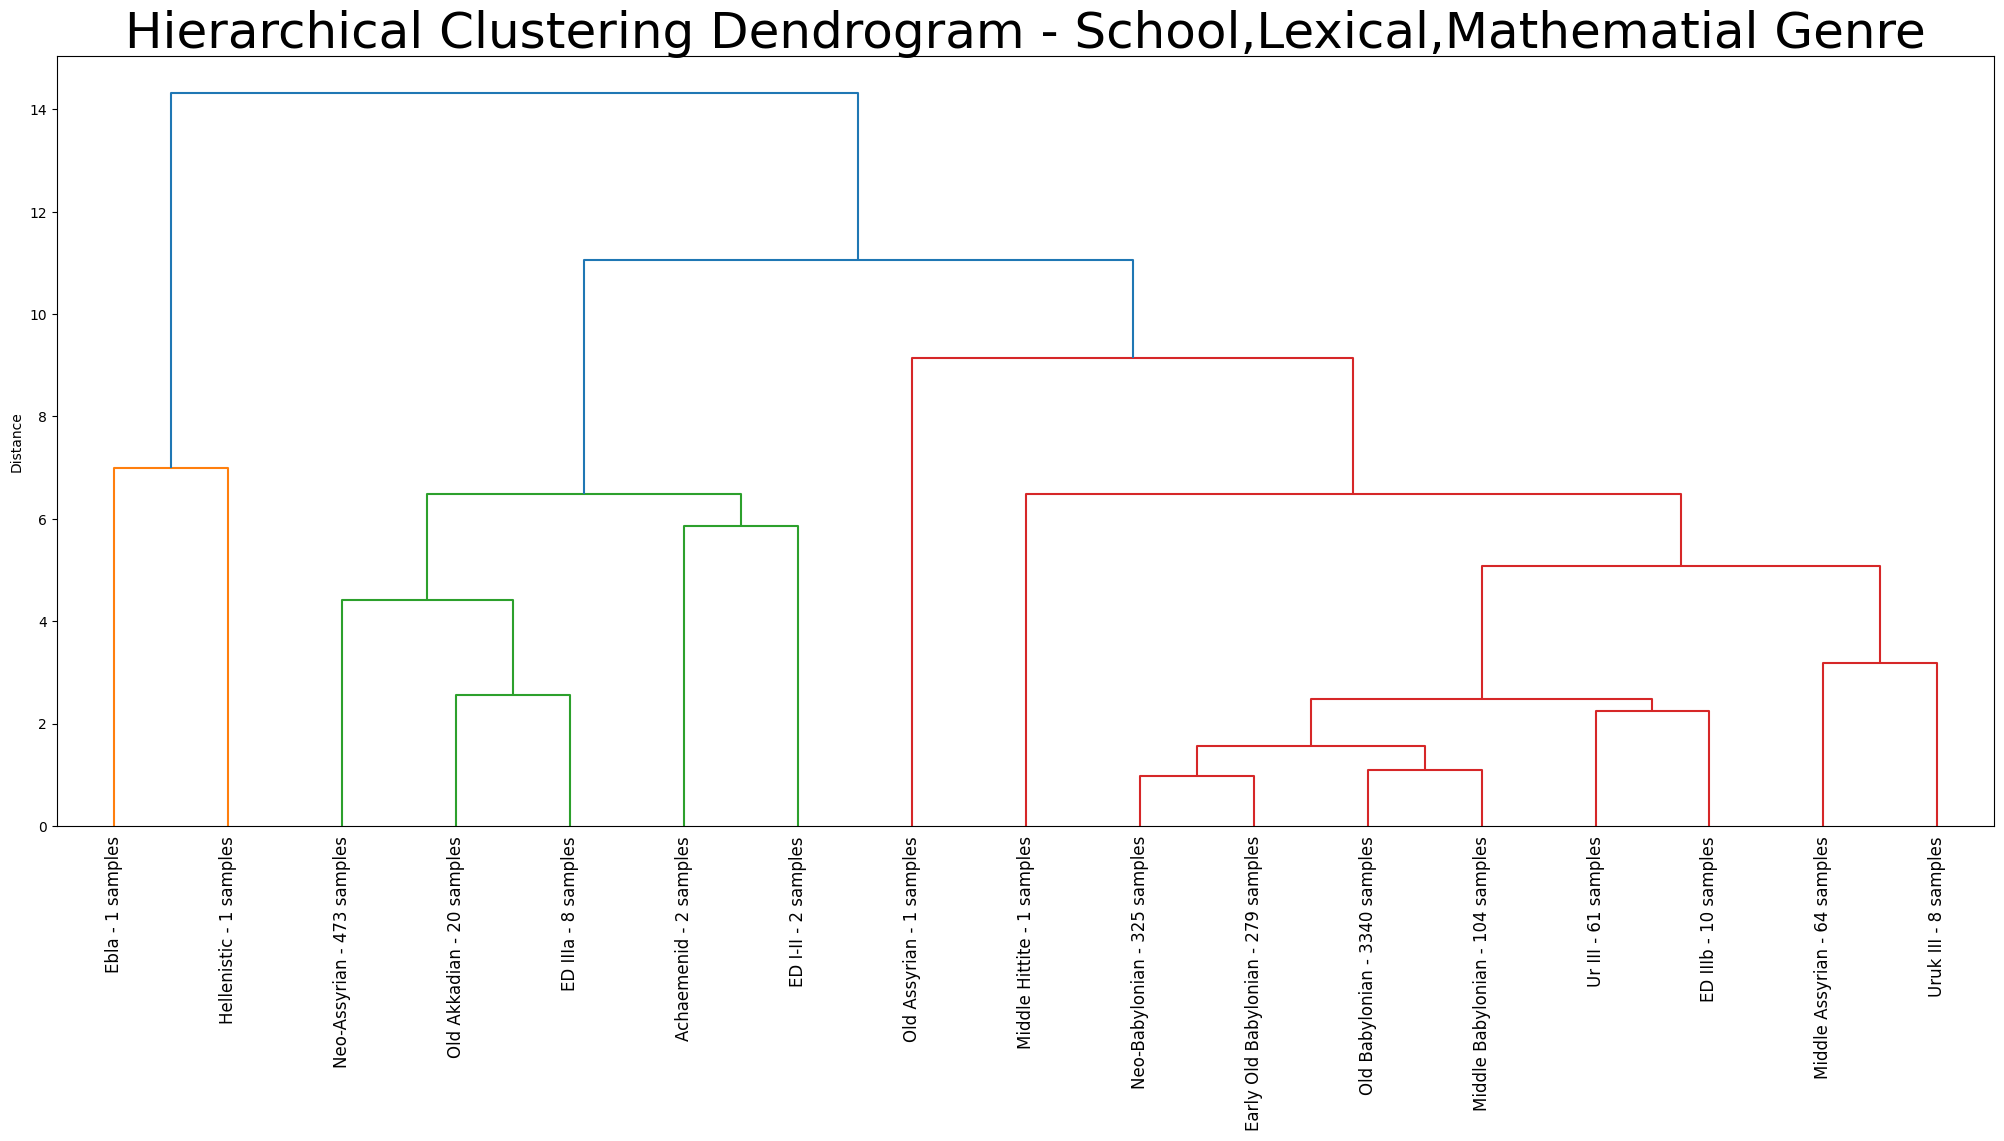

In [9]:
hierarchical_clustering_and_dendrogram(mean_encodings_df, "Period_Name", ",".join(genre)+" Genre", "output/"+",".join(genre)+"_genre_dendrogram.png")